# Unsupervised Machine Learning
- Train you machine on unlabelled data without any guidance

## There are two types of USML
- Clustering - - Grouping of similar data points in to cluster
- Association

### Clustering 
- K-Means(K-No of Clusters) Clustering
    - Choose the optimal value of K (using elbow method)
    - Inintializing the centroids
    - Finding out mean and distances
    - Repeat step 2 and 3 untill Convergence

- Elbow Method
    - Based on intertia 
    - $$ Sumation(i=1)->(n)(x-xi)^2 $$ 
        -$$ x->centroid, xi->other points $$
    - inertia is found by considering centroid value finding distance for all points to centroid.
    - if inertia is high i.e, the points from centroid is very far from inertia
    - if inertia is low i.e, the points from centroid is very less
    - inertia also called as with in same of squares error

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [7]:
x=df.iloc[:,0:4]
range_k=range(1,8)
wsse_list=[]
from sklearn.cluster import KMeans
for k in range_k:
    model=KMeans(n_clusters=k)
    model.fit(x)
    wsse=model.inertia_
    wsse_list.append(wsse)
    print("the wsse for k={} is {}".format(k,wsse))

the wsse for k=1 is 681.3706
the wsse for k=2 is 152.34795176035792
the wsse for k=3 is 78.85144142614601
the wsse for k=4 is 57.228473214285714
the wsse for k=5 is 46.44618205128205
the wsse for k=6 is 39.2865051948052
the wsse for k=7 is 34.37852258610955


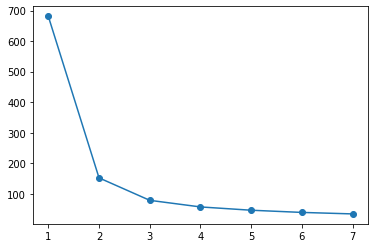

In [8]:
import matplotlib.pyplot as plt
x1=range_k
y1=wsse_list
plt.plot(x1,y1,marker='o')
plt.show()

In [9]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
pred_out=model.predict(x)
pred_out

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [11]:
df['pred_target']=pred_out
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred_target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0


In [12]:
df['pred_target'].value_counts()

1    62
0    50
2    38
Name: pred_target, dtype: int64